In [2]:
from matgen.base import CellComplex

In [3]:
# Load a cell complex.
filename = "pass1.tess"
cellcomplex = CellComplex.from_tess_file(filename)
print(cellcomplex)

<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [4]:
# Set disorienation angles theta from crystal orientations.
cellcomplex.set_theta_from_ori()

In [5]:
disangles = [gb.theta for gb in cellcomplex._GBs.values()]

In [6]:
len(disangles)

2977

In [7]:
disangles[:10]

[27.28354864840808,
 27.815643716239638,
 14.78556460373759,
 38.31054403012313,
 9.82438375863091,
 40.71391908240428,
 21.334120801675187,
 32.87743091796037,
 -1,
 -1]

In [8]:
max(disangles)

62.143944293361784

In [9]:
# Set special grain boundaries (GB) as HAGBs.
lower_thrd = 15
upper_thrd = None
cellcomplex.reset_special(lower_thrd=lower_thrd, upper_thrd=upper_thrd)

In [11]:
# Triple Junction characteristics
cellcomplex.to_TJset().get_properties()

{'p': 0.7645206438068579,
 'j0': 0.0712372790573112,
 'j1': 0.03535083020889127,
 'j2': 0.4209962506695233,
 'j3': 0.4724156400642742,
 'q': 0.2354793561931421,
 'Sp': 0.7874414356442988,
 'Sp_m': 1.2368500715966775,
 'Sp_s': -0.44940863595237873,
 'p_expected': 0.7648634172469202,
 'delta_p': 0.00034277344006228283,
 'S': 1.478513971006966,
 'S_m': 2.7408319865572595,
 'S_d': -1.2623180155502935,
 'kappa': -2.171269008913276,
 'delta_S': -0.6910725353626671,
 'd1': 0.03806228373702423,
 'd2': 0.4532871972318339,
 'd3': 0.5086505190311419,
 'sigma': 0.2851969265007199,
 'chi': -0.7273799666526775}

In [12]:
# Grain Gamma characteristics
cellcomplex.to_GGset().get_properties()

{'g': 0.2752016129032258,
 'gamma0': 0.5426871938418475,
 'gamma1': 0.3635409377186844,
 'gamma2': 0.09377186843946816,
 'delta1': 0.7949502677888295,
 'delta2': 0.20504973221117065,
 'S_g': 0.8488299968516182,
 'S': 1.3294491767287289,
 'S_m': 1.918772834296458,
 'S_d': -0.5893236575677291,
 'kappa': -3.2558897129900806,
 'delta_S': 0.03072055334287027}

In [13]:
# Kullback-Leibler divergence
from scipy.special import rel_entr

lower_thrd = 5 # initial
upper_thrd = None # initial

cellcomplex.reset_special(lower_thrd=lower_thrd)
qi = cellcomplex.j_tuple
prev_thrd = lower_thrd

Dkl = []

for current_thrd in range(10, 65, 5):
    cellcomplex.reset_special(lower_thrd=current_thrd)
    pi = qi
    qi = cellcomplex.j_tuple
    Dkl.append(rel_entr(pi, qi).sum())
    print(prev_thrd, '->', current_thrd, ":", rel_entr(pi, qi).sum())
    prev_thrd = current_thrd

5 -> 10 : 0.1263939880440097
10 -> 15 : 0.07451205604560204
15 -> 20 : 0.039096667909580274
20 -> 25 : 0.02447372155140018
25 -> 30 : 0.018605470418354156
30 -> 35 : 0.02231701241291309
35 -> 40 : 0.04477799591052866
40 -> 45 : 0.055567986899623695
45 -> 50 : 0.05444335017914393
50 -> 55 : inf
55 -> 60 : 0.520516710814445


In [17]:
import matplotlib.pyplot as plt

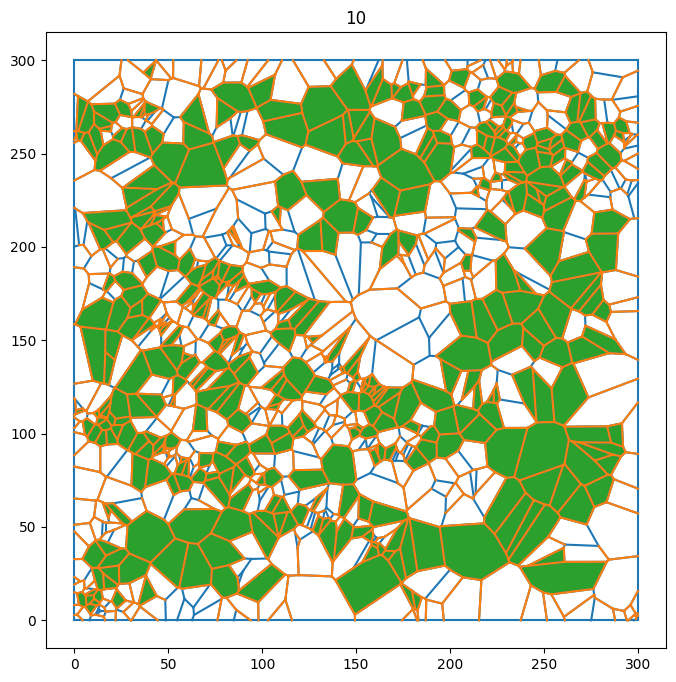

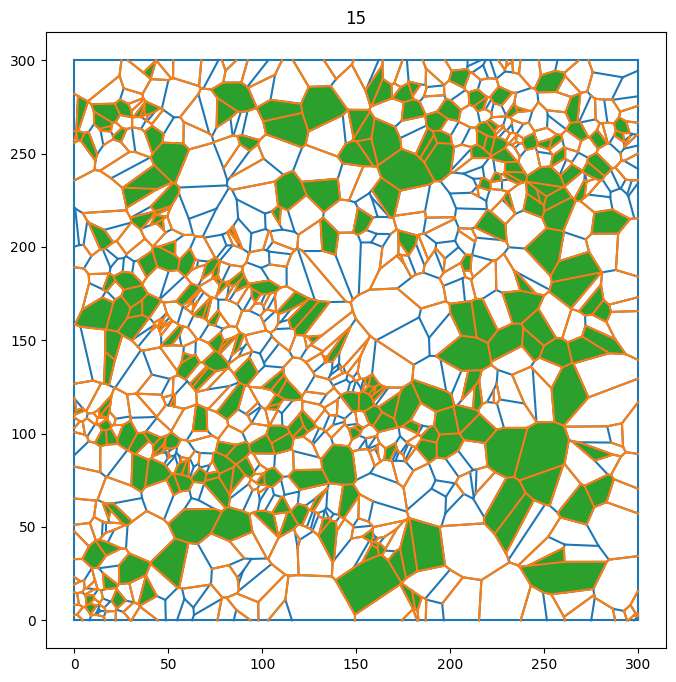

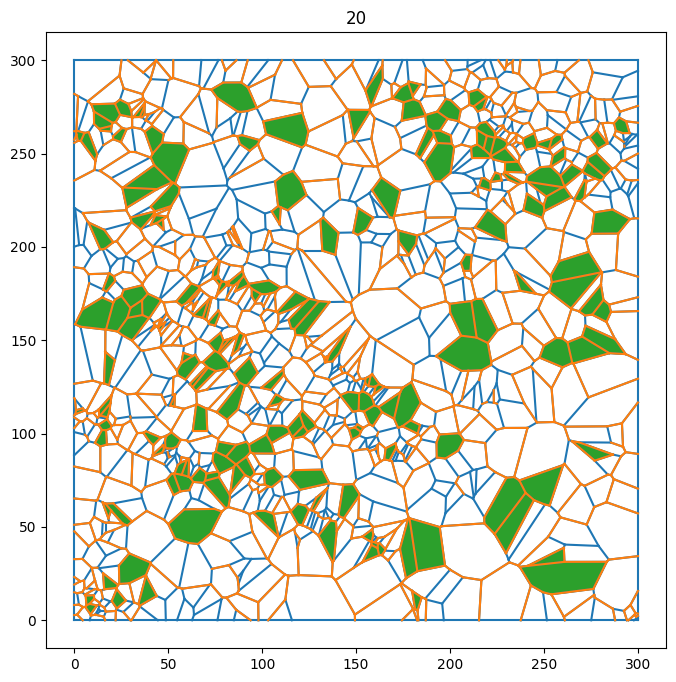

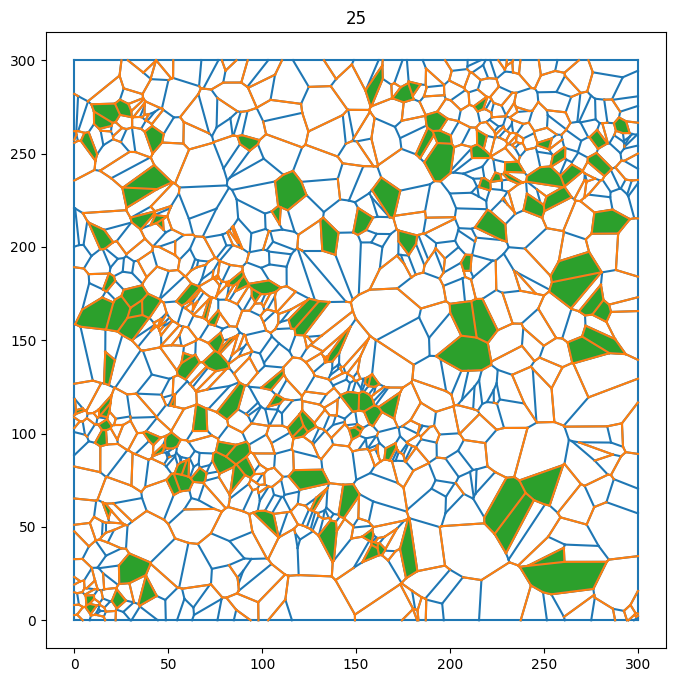

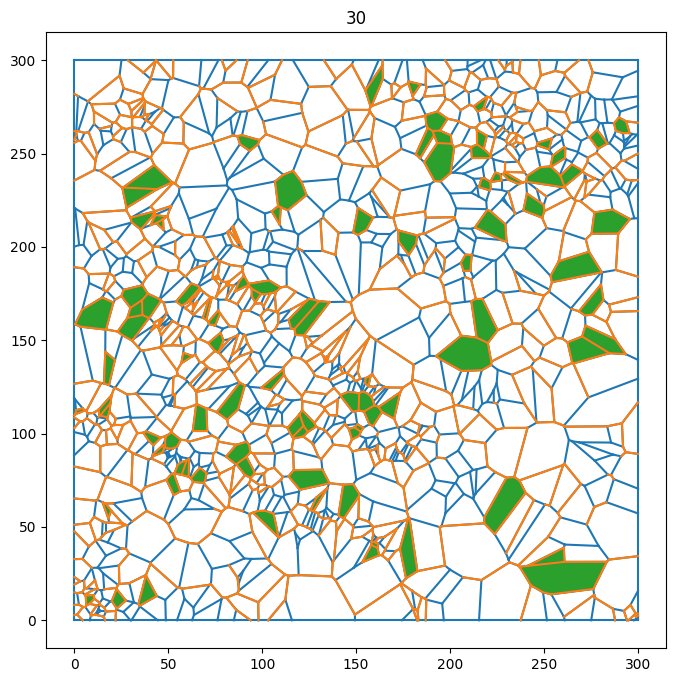

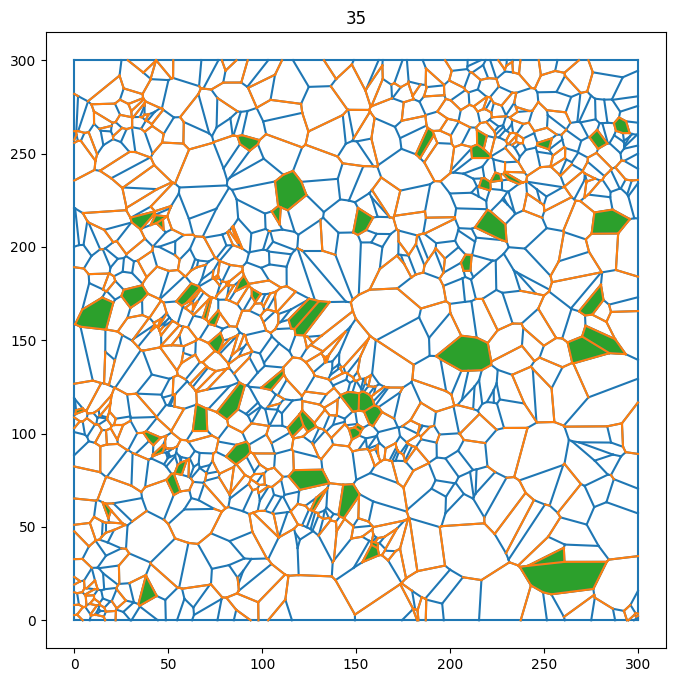

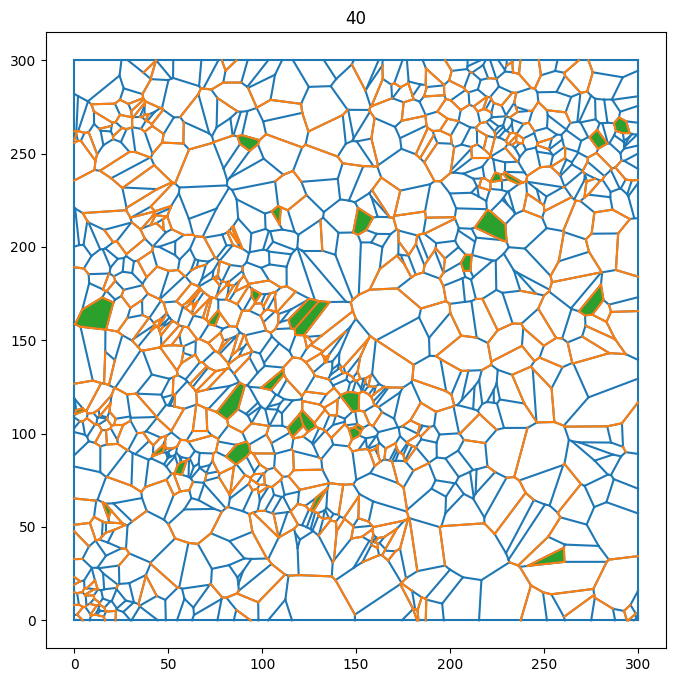

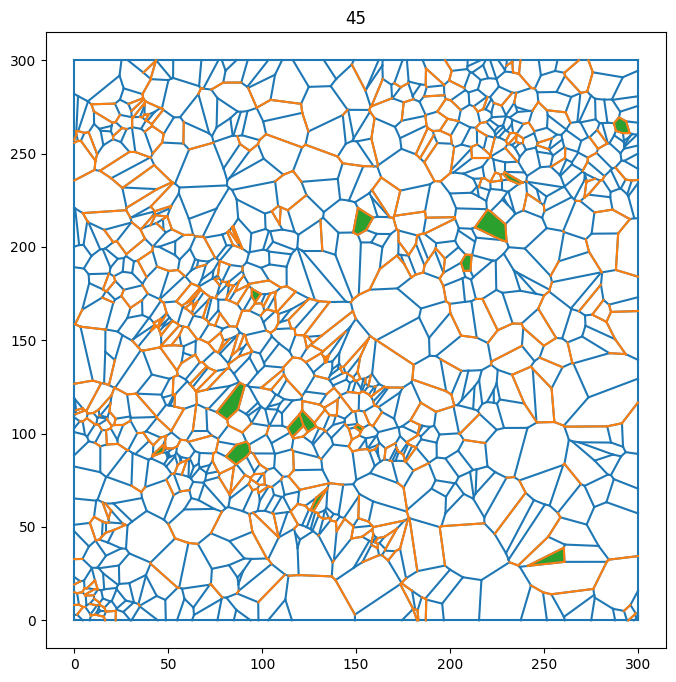

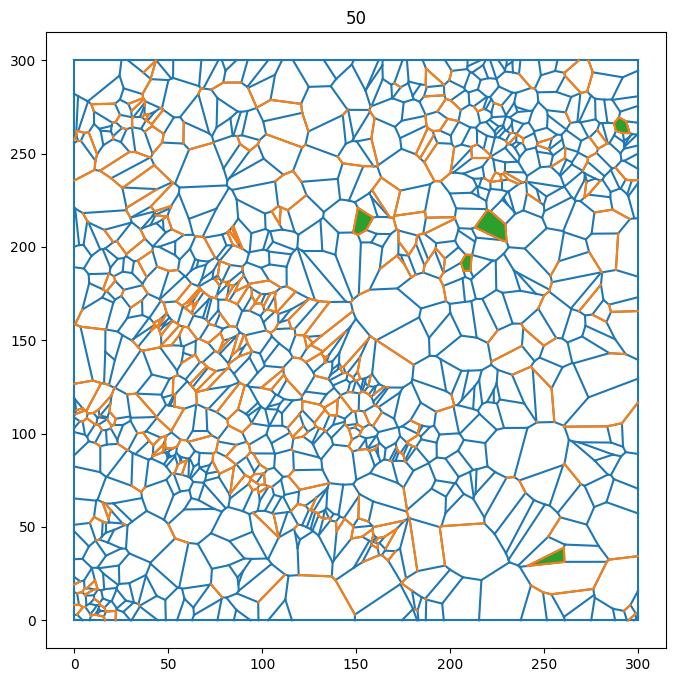

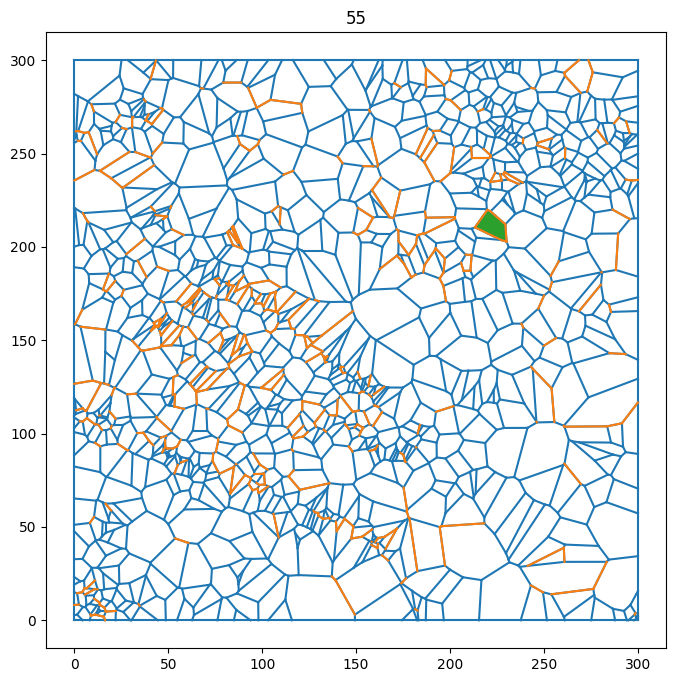

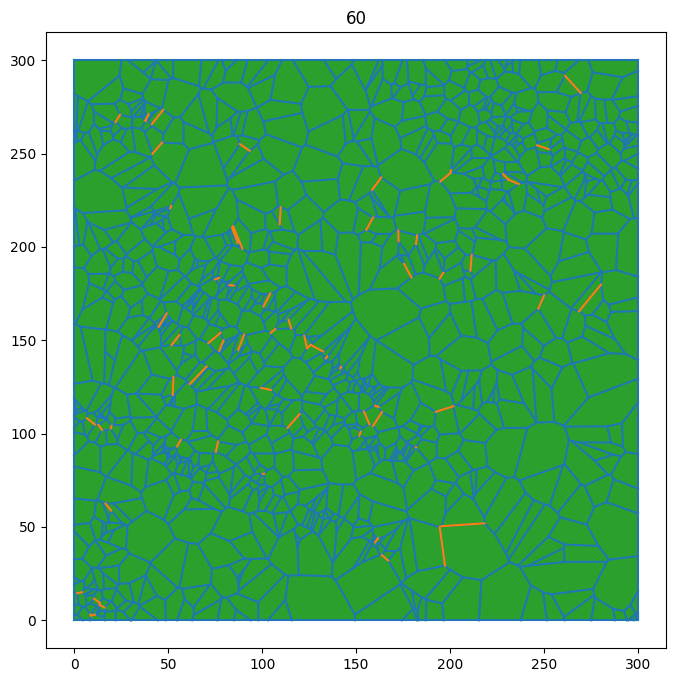

In [21]:
for current_thrd in range(10, 65, 5):
    cellcomplex.reset_special(lower_thrd=current_thrd)
    ax = cellcomplex.plot_edges(color='C0')
    cellcomplex.plot_edges(cellcomplex.get_special_ids(), color='C1', ax=ax)
    cellcomplex.plot_faces(cellcomplex.get_covered_ids(), color='C2', ax=ax)
    # plt.xlim((80, 180))
    # plt.ylim((150, 250))
    plt.title(str(current_thrd))
    plt.show()

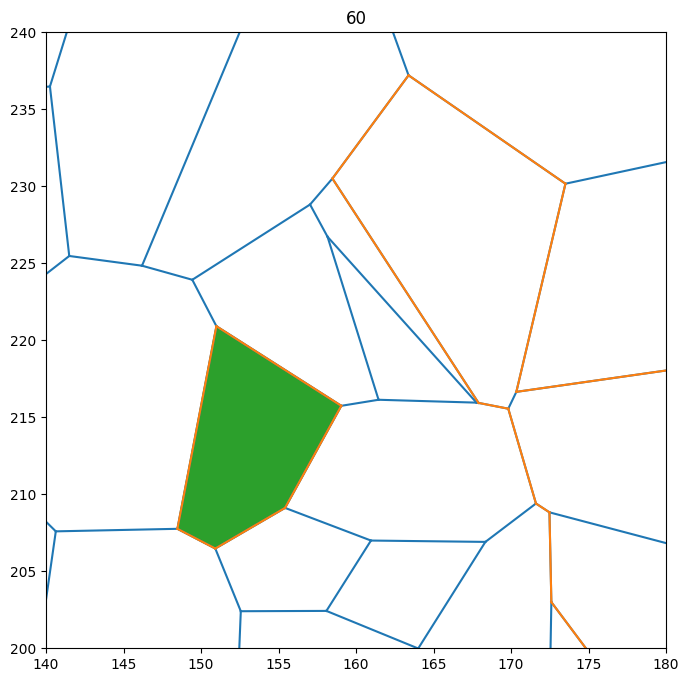

In [25]:
cellcomplex.reset_special(lower_thrd=45)
ax = cellcomplex.plot_edges(color='C0')
cellcomplex.plot_edges(cellcomplex.get_special_ids(), color='C1', ax=ax)
cellcomplex.plot_faces(cellcomplex.get_covered_ids(), color='C2', ax=ax)
plt.xlim((140, 180))
plt.ylim((200, 240))
plt.title(str(current_thrd))
plt.show()